In [806]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Clean up the numbers
pd.options.display.float_format = '{:,.4f}'.format

mouse_drug_data_to_load = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial_data_to_load = pd.read_csv("data/clinicaltrial_data.csv")

mouse_trail_data = pd.merge(mouse_drug_data_to_load,clinical_trial_data_to_load,on="Mouse ID",how='outer')

# Display the data table for preview and move drug to end
mouse_trail_data = mouse_trail_data[['Mouse ID','Timepoint','Tumor Volume (mm3)','Metastatic Sites','Drug']]
mouse_trail_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,f234,0,45.0000,0,Stelasyn
1,f234,5,47.3135,0,Stelasyn
2,f234,10,47.9043,0,Stelasyn
3,f234,15,48.7352,1,Stelasyn
4,f234,20,51.1127,2,Stelasyn


## Tumor Response to Treatment

In [807]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = mouse_trail_data[['Drug','Timepoint','Tumor Volume (mm3)']].copy()
mean_tumor_volume = mean_tumor_volume.groupby(['Drug','Timepoint'],as_index=False).mean()
# Preview DataFrame
mean_tumor_volume.head(6)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.0000
1,Capomulin,5,44.2661
2,Capomulin,10,43.0843
3,Capomulin,15,42.0643
4,Capomulin,20,40.7163
5,Capomulin,25,39.9395


In [808]:
res_err = pd.DataFrame(mouse_trail_data.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)'])

res_err = res_err.reset_index()
# Preview DataFrame
res_err.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.0000
1,Capomulin,5,0.4486
2,Capomulin,10,0.7027
3,Capomulin,15,0.8386
4,Capomulin,20,0.9097


In [809]:
# Minor Data Munging to Re-Format the Data Frames
by_drug = pd.DataFrame(mouse_trail_data.groupby(['Drug','Timepoint']).mean()['Tumor Volume (mm3)'])
by_drug = by_drug.unstack(level = 0)
by_drug.columns = by_drug.columns.get_level_values(1)

by_drug.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.0000,45.0000,45.0000,45.0000,45.0000,45.0000,45.0000,45.0000,45.0000,45.0000
5,44.2661,46.5031,47.0620,47.3892,46.7961,47.1256,47.2490,43.9449,47.5275,46.8518
10,43.0843,48.2851,49.4039,49.5823,48.6942,49.4233,49.1015,42.5320,49.4638,48.6899
15,42.0643,50.0941,51.2964,52.4000,50.9330,51.3597,51.0673,41.4951,51.5294,50.7791
20,40.7163,52.1570,53.1977,54.9209,53.6441,54.3644,53.3467,40.2383,54.0674,53.1703


In [810]:
# Set up err DF
tum_res_sem = pd.DataFrame(mouse_trail_data.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)'])
tum_res_sem = tum_res_sem.unstack(level=0)
tum_res_sem.columns = tum_res_sem.columns.get_level_values(1)

In [811]:
tumor_res = by_drug[['Capomulin','Infubinol','Ketapril','Placebo']].copy()

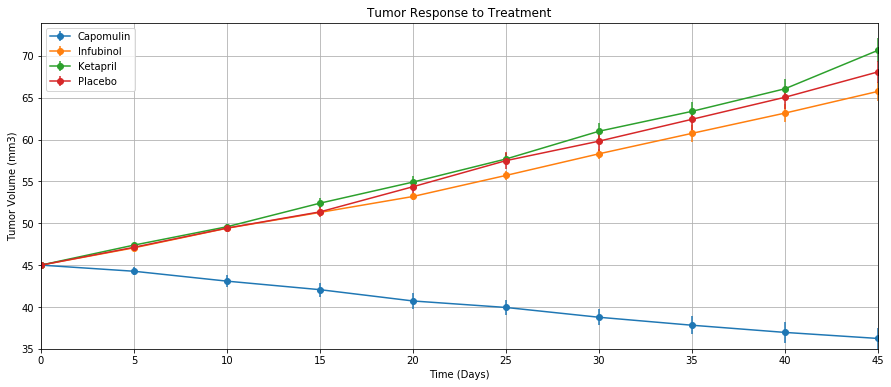

In [812]:
tumor_res.plot(grid=True,
               yerr=tum_res_sem,
               figsize=(15,6),
               ylim=35,
               title="Tumor Response to Treatment",
               marker='o'
              )
#plt legend to hide 'drugs'
plt.legend()
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Time (Days)');

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [813]:
# Make some new dfs I am guessing it wants it displayed like the other tables above and not like the example.
meta_res_mean = pd.DataFrame(mouse_trail_data.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites'])
meta_res_sem = pd.DataFrame(mouse_trail_data.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites'])
# Reformat
meta_res_mean = meta_res_mean.unstack(level = 0)
meta_res_sem = meta_res_sem.unstack(level = 0)

meta_res_mean.columns = meta_res_mean.columns.get_level_values(level = 1)
meta_res_sem.columns = meta_res_sem.columns.get_level_values(level = 1)


In [814]:
meta_res_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.1600,0.3810,0.2800,0.3043,0.2609,0.3750,0.3200,0.1200,0.2400,0.1667
10,0.3200,0.6000,0.6667,0.5909,0.5238,0.8333,0.5652,0.2500,0.4783,0.5000
15,0.3750,0.7895,0.9048,0.8421,0.8571,1.2500,0.7647,0.3333,0.7826,0.8095
20,0.6522,1.1111,1.0500,1.2105,1.1500,1.5263,1.0000,0.3478,0.9524,1.2941


In [815]:
meta_res_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.0748,0.1086,0.0917,0.0981,0.0936,0.1009,0.0952,0.0663,0.0872,0.0777
10,0.1254,0.1522,0.1594,0.1420,0.1636,0.1153,0.1057,0.0903,0.1237,0.1091
15,0.1320,0.1806,0.1940,0.1914,0.1587,0.1902,0.1364,0.1153,0.1534,0.1117
20,0.1616,0.2410,0.2348,0.2367,0.1817,0.2341,0.1715,0.1194,0.2009,0.1664


In [816]:
meta_res = meta_res_mean[['Capomulin','Infubinol','Ketapril','Placebo']].copy()

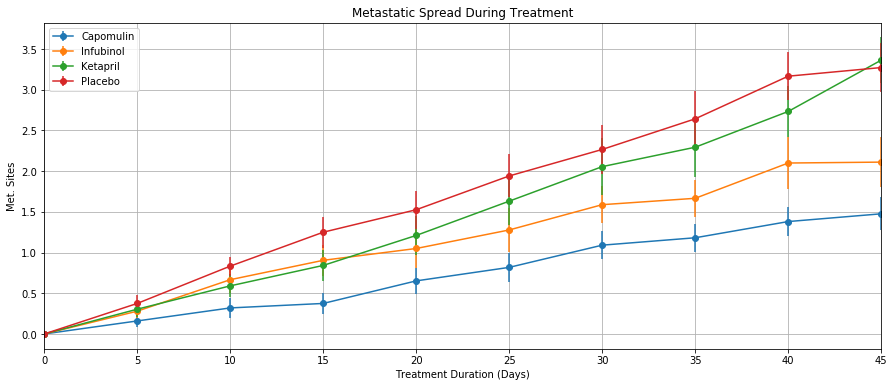

In [817]:
meta_res.plot(grid=True,
               yerr=meta_res_sem,
               figsize=(15,6),
               title="Metastatic Spread During Treatment",
               marker='o'
              )
#plt legend to hide 'drugs'
plt.legend()
plt.ylabel('Met. Sites')
plt.xlabel('Treatment Duration (Days)');

## Survival Rates

In [818]:
sur_count = pd.DataFrame(mouse_trail_data.groupby(['Drug', 'Timepoint']).count()['Mouse ID'])
sur_count = sur_count.reset_index()
sur_count.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [819]:
#reformat drugs to columns
sur_rate = pd.DataFrame(mouse_trail_data.groupby(['Drug', 'Timepoint']).count()['Mouse ID'])
sur_rate = sur_rate.unstack(level = 0)
sur_rate.columns = sur_rate.columns.get_level_values(level = 1)


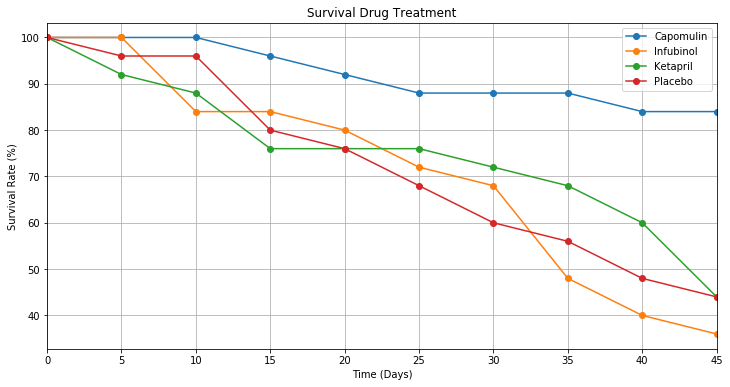

In [820]:
# Select used drugs
sur_rate_c = sur_rate[['Capomulin','Infubinol','Ketapril','Placebo']].copy()

# Generate the Plot (Accounting for percentages)
sur_pct = sur_rate_c/sur_rate_c.loc[0,:] * 100

sur_plot = sur_pct.plot(grid=True,
             figsize=(12,6),
             title='Survival Drug Treatment',
             marker='o'
             )

sur_plot.set_ylabel('Survival Rate (%)')
sur_plot.set_xlabel('Time (Days)')
sur_plot.legend();

## Summary Bar Graph

In [824]:
cuz = pd.DataFrame(mouse_trail_data.groupby(['Drug','Timepoint']).mean()['Tumor Volume (mm3)'])

cuz = cuz.unstack(level = 0)

cuz.columns = cuz.columns.get_level_values(level = 1)

pct_drug = (cuz.loc[45, :] - cuz.loc[0, :])/cuz.loc[0, :] * 100
pct_drug.head(10)

Drug
Capomulin   -19.4753
Ceftamin     42.5165
Infubinol    46.1235
Ketapril     57.0288
Naftisol     53.9233
Placebo      51.2980
Propriva     47.2412
Ramicane    -22.3209
Stelasyn     52.0851
Zoniferol    46.5798
dtype: float64

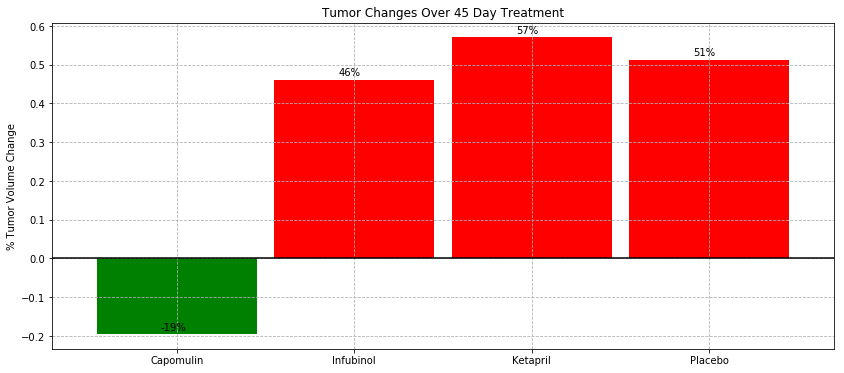

In [825]:
chop_it_up = pct_drug[['Capomulin', 'Infubinol', 'Ketapril','Placebo']].copy()
chop_it_up = chop_it_up/100
# Splice the data between passing and failing drugs

splice_pos = chop_it_up > 0


fig = plt.figure()
ax = fig.add_subplot(1,1,1)

sum_bar = chop_it_up.plot.bar(grid=True,
                    color=splice_pos.map({True: 'R', False: 'G'}),
                    figsize=(14,6),
                    align="center",
                    rot=0,
                    title='Tumor Changes Over 45 Day Treatment',
                    width=.9
                   )

ax.axhline(y=0, color = 'black')
ax.grid(linestyle='--')
ax.set_ylabel("% Tumor Volume Change")
ax.set_xlabel("")


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (p.get_x()+.4*width, p.get_y() + height + .01))



# Show the Figure
fig.show()